# Trabajo modelado matematico 2 

## Jesús Miguel Sepúlveda Suárez

In [143]:
## Librerias que vamos a usar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [197]:
def funcline(params,x):
    return params[0]*x+params[1]


def Errorlineal(tpl,x,y,error):
    return (funcline(tpl,x)-y)/(error)


def graficalineal(x,y,error):
    p0 = [0,0]
    bestt,suss = leastsq(Errorlineal, p0, args=(x,y,error))
    y2 = funcline(bestt,x)
    plt.errorbar(x,y, error,capsize=7, fmt='o')
    plt.plot(x,y2, ":k")
    print(bestt[0], bestt[1])
    
def make_gaussian(tpl,x):
    """
    Funcion que hace una gaussiana a partir de una tupla y el dominio de los datos
    """
    mu = tpl[0]
    sigma = tpl[1]
    A = tpl[2]
    gauss = A*np.exp(-((x-mu)**2)/2/sigma**2)
    return gauss

def ErrorFunc(tpl,x,y):
    """
    Funcion que calcula el error de una gaussiana
    """
    gauss = make_gaussian(tpl,x)
    chi = np.ravel(((y-gauss)**2)/gauss)
    return chi

def pixeles3(recorte):
    datos = np.zeros((166,51))
    for i in range (0,166):
        for j in range (0,51):
            datos[i,j]=recorte[i,j]*(0.1**2)
            
    datos=datos*100
    return datos

In [145]:
# Se hace la funcion de la recta y se le suma ruido de una distribución normal
m = 2
b = 0.1
x = np.arange(0,10,1)
np.random.seed(1)
error = np.random.randint(1,10,10)
ruido = np.random.normal(0,1,10)
y = m*x+b
y_ruido = m*x+b + ruido

<ErrorbarContainer object of 3 artists>

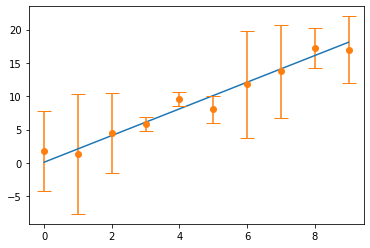

In [146]:
# Se grafica la recta con sus barras de ruido
plt.plot(x,y)
plt.errorbar(x,y_ruido, error,capsize=7, fmt='o')
# plt.plot(x,ruido,'r--')

1.9739473849259521 0.5271943251531827


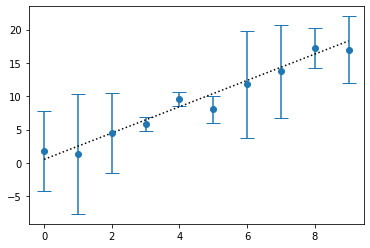

In [147]:
# Se grafica la mejor recta con el ruido de la distribucion normal por minimos cuadrados
graficalineal(x,y_ruido,error)

## Exploracion de parametros con pasos de 0.5

In [148]:
# Se hace exploracion de parametros a fuerza bruta para obtener el menor chi2 y saber que recta es la mejor
b_list = np.arange(-5,7,0.5)
m_list = np.arange(-0.5,5,0.5)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 
        

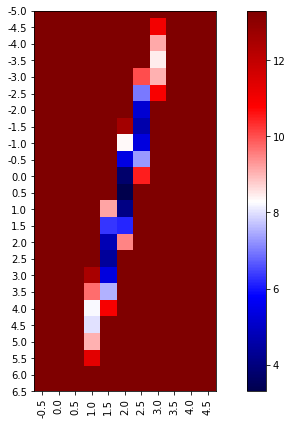

In [149]:
plt.figure(figsize=(11,7))
plt.imshow(chi2, vmax=13.3, cmap='seismic')
plt.xticks(ticks=np.arange(0,11,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,24,1),labels=b_list)
plt.colorbar()

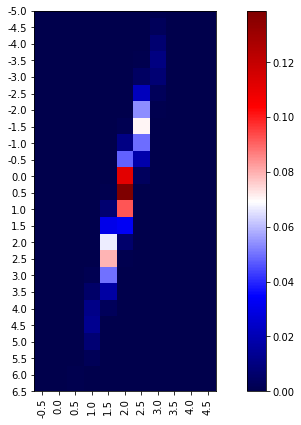

In [150]:
like = np.exp(-chi2/2)
pt = like.sum()
like = like/pt
plt.figure(figsize=(11,7))
plt.imshow(like, cmap='seismic')
plt.xticks(ticks=np.arange(0,11,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,24,1),labels=b_list)
plt.colorbar()

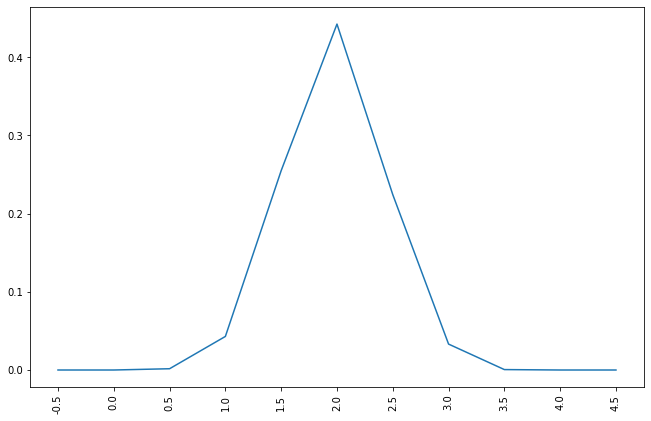

In [151]:
# se grafica la probabilidad del eje x "La media"
prob_m = like.sum(axis=0)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,11,1),labels=m_list,rotation=90)
plt.plot(prob_m)

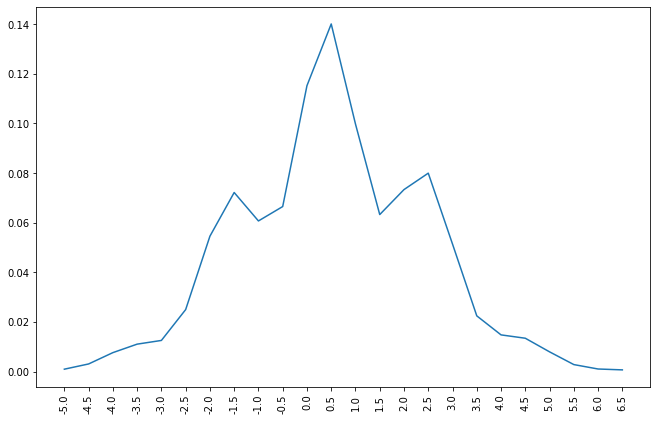

In [152]:
# Se grafica la probabilidad del eje y "La constante b"
prob_b = like.sum(axis=1)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,24,1),labels=b_list,rotation=90)
plt.plot(prob_b)

## Evaluar el chi2 con pasos mas pequeños "0.1"

## Se hace una aproximacion de los limites para oberservar mejor los valores del centro

In [153]:
b_list = np.arange(0,1.1,0.1)
m_list = np.arange(1.5,2.6,0.1)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

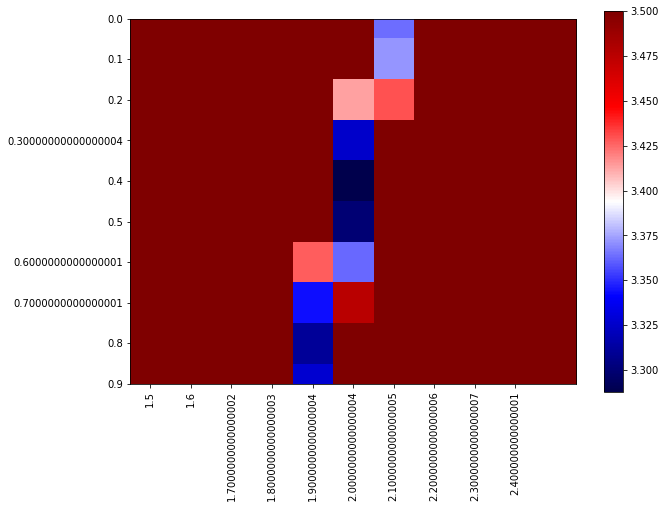

In [154]:
plt.figure(figsize=(10,7))
plt.imshow(chi2, vmax=3.5, cmap='seismic')
plt.xticks(ticks=np.arange(0,10,1),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,10,1),labels=b_list)
plt.colorbar()

## Se toman pasos mas pequeños sin aproximar los limites

In [155]:
b_list = np.arange(-5.5,6.5,0.01)
m_list = np.arange(0.3,3.7,0.01)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

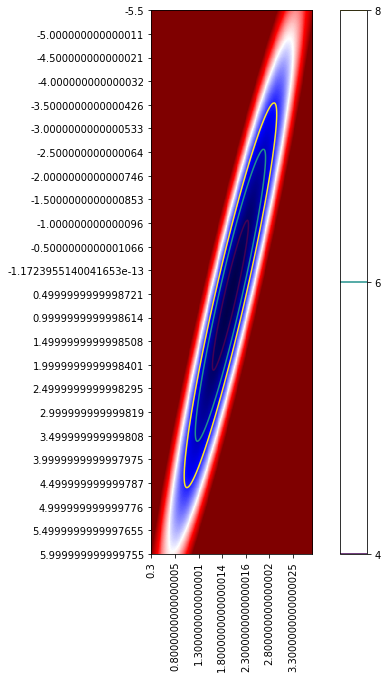

In [156]:
plt.figure(figsize=(10,10))
plt.imshow(chi2, vmax=20, cmap='seismic')
plt.contour(chi2, levels=[4,6,8])
plt.xticks(ticks=np.arange(0,len(m_list),50),labels=m_list[::50],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),50),labels=b_list[::50])
plt.colorbar()

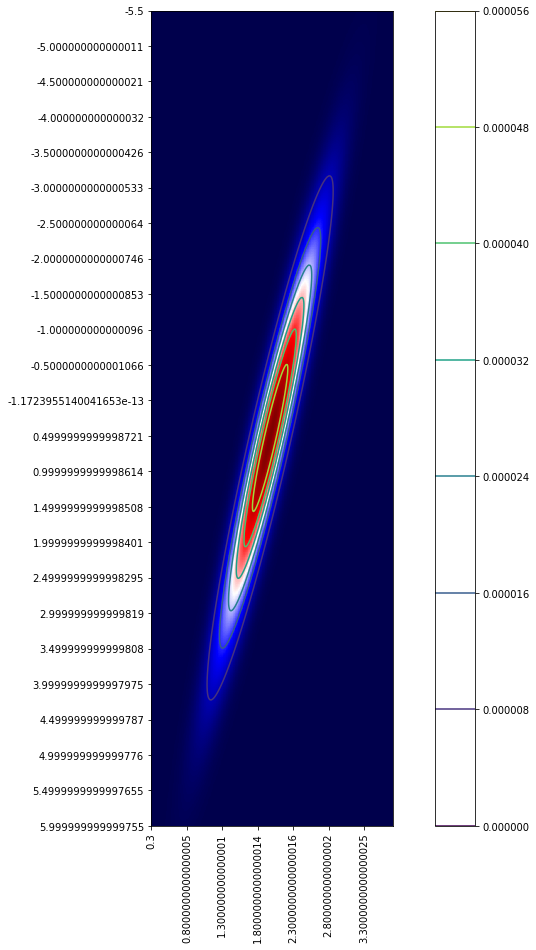

In [157]:
like = np.exp(-chi2/2)
pt = like.sum()
like = like/pt
plt.figure(figsize=(15,15))
plt.imshow(like, cmap='seismic')
plt.contour(like)
plt.xticks(ticks=np.arange(0,len(m_list),50),labels=m_list[::50],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),50),labels=b_list[::50])
plt.colorbar()

## Modelo gaussiano comparado con la probabilidad

[1.97409408 0.44575579 0.00895622]


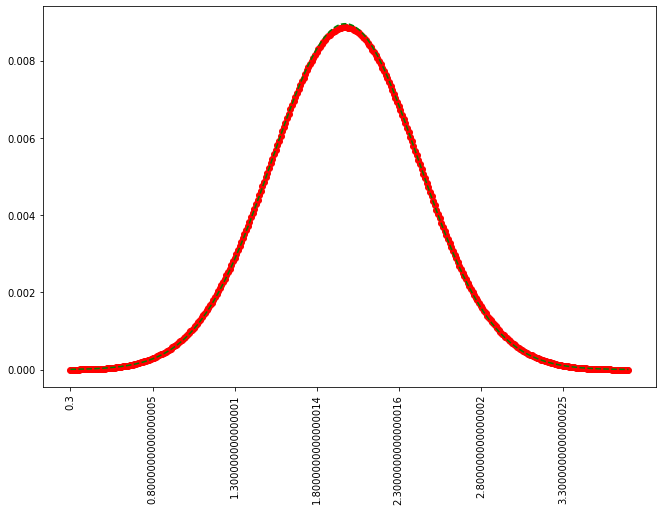

In [158]:
prob_m = like.sum(axis=0)
param_m=[2, 0.3, 1]
bestt_m,suss = leastsq(ErrorFunc, param_m, args=(m_list, prob_m))
m_model = make_gaussian(bestt_m,m_list)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,len(m_list),50),labels=m_list[::50],rotation=90)
plt.plot(prob_m, "-or", label='Probabilidad m')
plt.plot(m_model, "--g",label='Modelo gaussiano')
print(bestt_m)

[0.52707476 1.87332394 0.00213251]


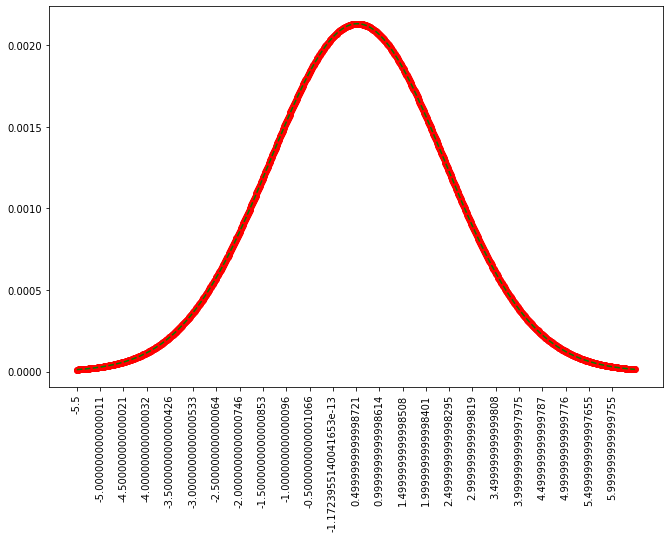

In [159]:
prob_b = like.sum(axis=1)
param_b=[0.5, 2, 0.2]
bestt_b,suss = leastsq(ErrorFunc, param_b, args=(b_list, prob_b))
b_model = make_gaussian(bestt_b, b_list)
plt.figure(figsize=(11,7))
plt.xticks(ticks=np.arange(0,len(b_list),50),labels=b_list[::50],rotation=90)
plt.plot(prob_b, "-or" ,label='Probabilidad b')
plt.plot(b_model, "--g", label='Modelo gaussiano')
print(bestt_b)

## Malla de probabilidad

In [160]:
# Malla grande con pasos de 0.5
b_list = np.arange(-7.5,9,0.5)
m_list = np.arange(-0.5,5.5,0.5)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

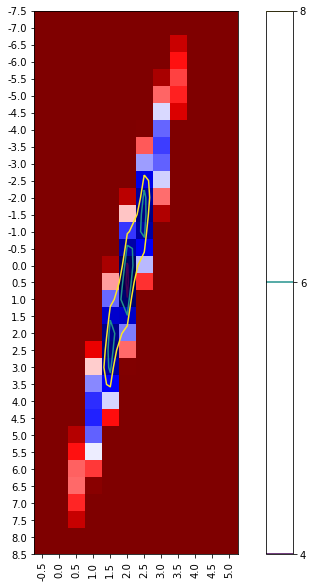

In [161]:
plt.figure(figsize=(10,10))
plt.imshow(chi2, vmax=20, cmap='seismic')
plt.contour(chi2, levels=[4,6,8])
plt.xticks(ticks=np.arange(0,len(m_list)),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list)),labels=b_list)
plt.colorbar()

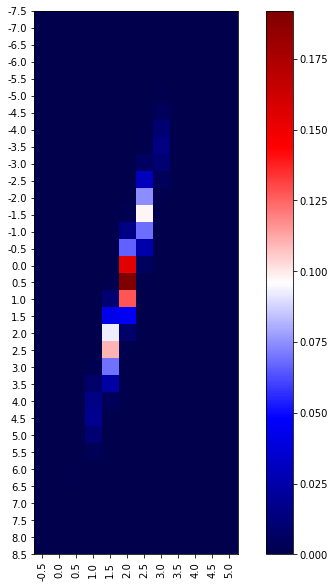

In [162]:
like = np.exp(-chi2/2)
# pt = like.sum()
# like = like/pt
plt.figure(figsize=(10,10))
plt.imshow(like, cmap='seismic')
# plt.contour(like)
plt.xticks(ticks=np.arange(0,len(m_list)),labels=m_list,rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list)),labels=b_list)
plt.colorbar()

In [163]:
like.shape
# 4 en x
# 11 en y

(33, 12)

In [164]:
# Se hacen 9 recortes del likelihood
reco1=like[0:11,0:4]
reco2=like[0:11,4:8]
reco3=like[0:11,8:12]
reco4=like[11:22,0:4]
reco5=like[11:22,4:8]
reco6=like[11:22,8:12]
reco7=like[22:33,0:4]
reco8=like[22:33,4:8]
reco9=like[22:33,8:12]

In [165]:
def pixeles(recorte):
    datos = np.zeros((11,4))
    for i in range (0,11):
        for j in range (0,4):
            datos[i,j]=recorte[i,j]*(0.5**2)
            
    prob=datos.sum()
    return prob

In [166]:
malla = np.zeros((3,3))
datos1 = pixeles(reco1)
malla[0,0] = datos1
datos2 = pixeles(reco2)
malla[0,1] = datos2
datos3 = pixeles(reco3)
malla[0,2] = datos3
datos4 = pixeles(reco4)
malla[1,0] = datos4
datos6 = pixeles(reco6)
malla[1,2] = datos6
datos7 = pixeles(reco7)
malla[2,0] = datos7
datos8 = pixeles(reco8)
malla[2,1] = datos8
datos9 = pixeles(reco9)
malla[2,2] = datos9
datosre = datos1 + datos2 + datos3 + datos4 + datos6 + datos7 + datos8 + datos9
malla

array([[1.70332547e-28, 2.06611143e-02, 5.01908110e-04],
       [5.70142561e-04, 0.00000000e+00, 5.55513860e-11],
       [1.50262617e-02, 6.97710419e-03, 4.70249460e-48]])

In [167]:
print(m_list[4], m_list[8])

1.5 3.5


In [168]:
print(b_list[11],b_list[22])

-2.0 3.5


In [169]:
# Malla de adentro pasos de 0.01
b_list = np.arange(-2,3.51,0.01)
m_list = np.arange(1.5,3.51,0.01)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

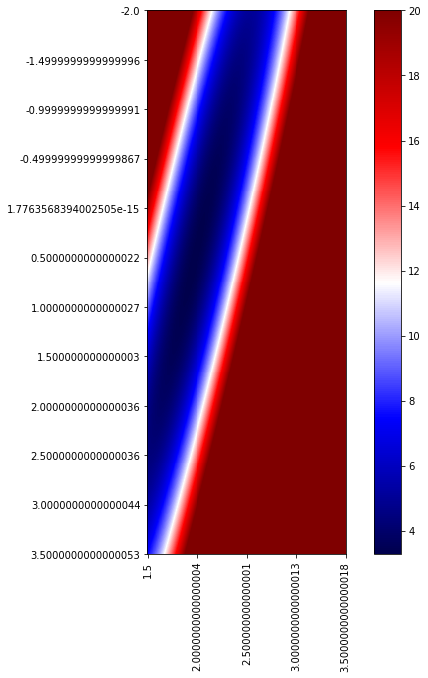

In [170]:
plt.figure(figsize=(10,10))
plt.imshow(chi2, vmax=20, cmap='seismic')
plt.xticks(ticks=np.arange(0,len(m_list),50),labels=m_list[::50],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),50),labels=b_list[::50])
plt.colorbar()

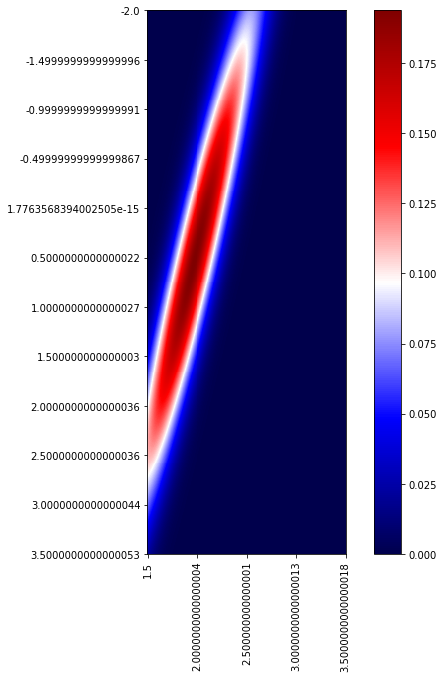

In [171]:
like = np.exp(-chi2/2)
# pt = like.sum()
# like = like/pt
plt.figure(figsize=(10,10))
plt.imshow(like, cmap='seismic')
# plt.contour(like)
plt.xticks(ticks=np.arange(0,len(m_list),50),labels=m_list[::50],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),50),labels=b_list[::50])
plt.colorbar()

In [172]:
like.shape

(551, 201)

In [173]:
def pixeles1(recorte):
    datos = np.zeros((551,201))
    for i in range (0,551):
        for j in range (0,201):
            datos[i,j]=recorte[i,j]*(0.01**2)
            
    prob=datos.sum()
    return prob



In [177]:
datos5 = pixeles1(like)
malla[1,1] = datos5
pmalla=malla.sum()
malla= malla/pmalla
malla.sum()

0.9999999999999999

## Prior

In [179]:
b_list = np.arange(-8,8.6,0.1)
m_list = np.arange(-0.5,4.6,0.1)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() 

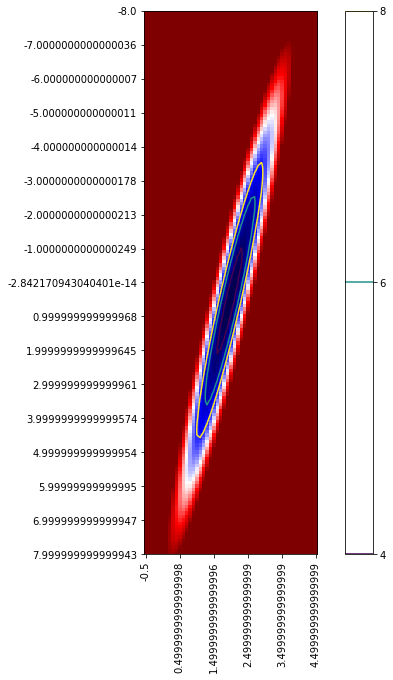

In [180]:
plt.figure(figsize=(10,10))
plt.imshow(chi2, vmax=20, cmap='seismic')
plt.contour(chi2, levels=[4,6,8])
plt.xticks(ticks=np.arange(0,len(m_list),10),labels=m_list[::10],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),10),labels=b_list[::10])
plt.colorbar()

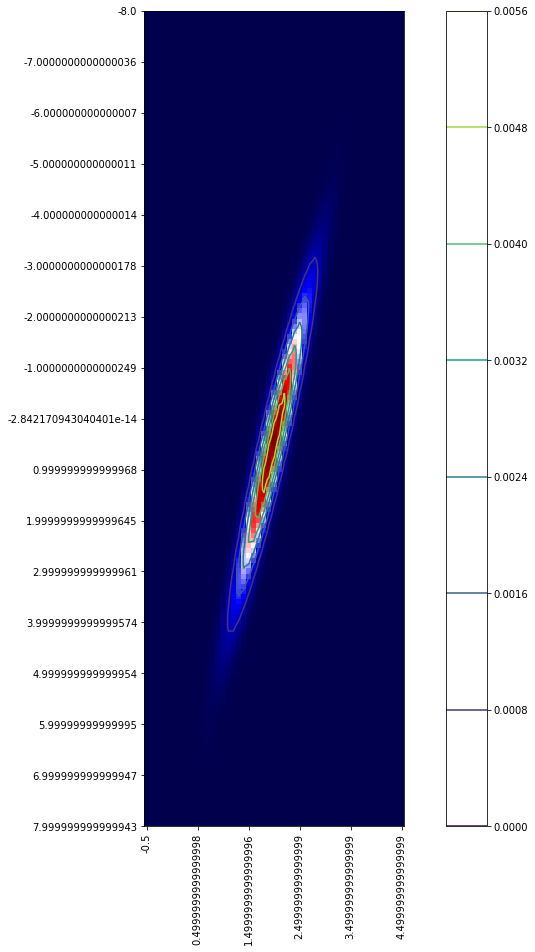

In [181]:
like = np.exp(-chi2/2)
pt = like.sum()
like = like/pt
plt.figure(figsize=(15,15))
plt.imshow(like, cmap='seismic')
plt.contour(like)
plt.xticks(ticks=np.arange(0,len(m_list),10),labels=m_list[::10],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),10),labels=b_list[::10])
plt.colorbar()

In [207]:
matriz = pixeles3(like)
matriz[0:81,::]=0

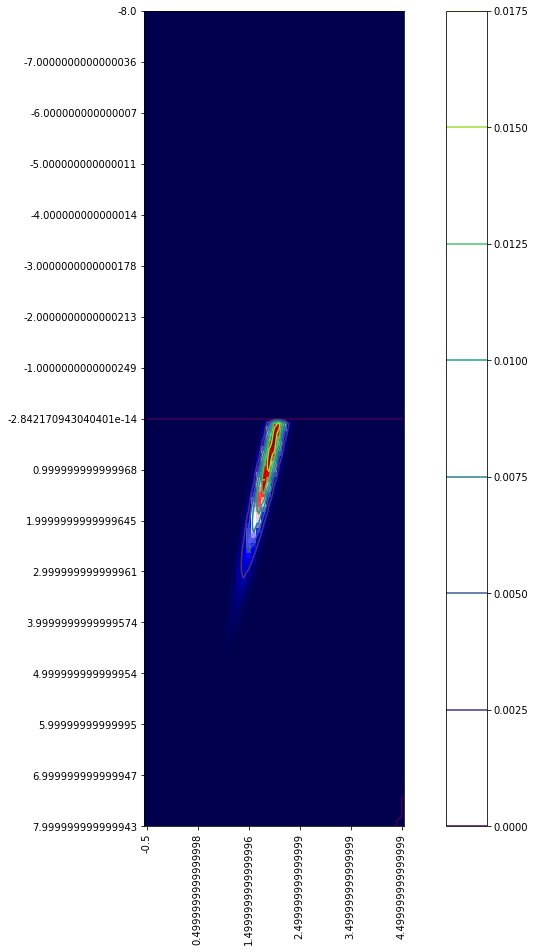

In [219]:
nuevo = like*matriz
pt = nuevo.sum()
nuevo = nuevo/pt
plt.figure(figsize=(15,15))
plt.imshow(nuevo, cmap='seismic')
plt.contour(nuevo)
plt.xticks(ticks=np.arange(0,len(m_list),10),labels=m_list[::10],rotation=90)
plt.yticks(ticks=np.arange(0,len(b_list),10),labels=b_list[::10])
plt.colorbar()